Michael O'Donnell 

02/15/2024

STC 510 - Module 6 Basics Assignment

For this assignment, I will be looking at a social network where I will try to remove the most effective node to disrupt the network. I will specifically be looking at the baseball steriod use network. This network contains players who were using steriods and providers giving access to players. I believe that if I can determine a major provider in the network and eliminate them from the network, then I could majorily disrupt the flow of steriods in the mlb. 

I can't help but think of the ethics here. Should players be allowed to juice? Who doesn't like watching some player have a massive hit? Fair enough; however, steriods can have devastating effects on players who may feel pressured to use to be able to compete. They also may be coerced or taken advantage of to use by providers giving them access to the potentially harmful drug. Even though anabolic steriods can be used safely and are used for legitimate reasons, I cannot be sure that is happening here. I also cannot help but think of the players who don't use. Is it fair to them that they have to compete against players with an obvious advantage? I don't think the players who take steriods are immoral neccessarily, but the providers in this case are the ones who need to be investigated and stopped. I believe that if I can find and eliminate the most connected provider or player, it will be like cutting the head off of a snake. 

http://orgnet.com/steroids.html

https://my.clevelandclinic.org/health/treatments/5521-anabolic-steroids

**Disclaimer**: I used chatgpt in many instances to assist in writing code. Obviously I did not plaigarize any of the code as I cannot have chatgpt do the assignment for me, but in cases when I was in a rut, I found more success using chatgpt than Google and Stack Overflow. 

------------------------

To begin the assignment, I need to import the modules I will be using along with the dataset I will be exploring. There are 2 CSV files that have the connections which I am going to import into dataframes.

-------------------------

In [19]:
#import statements
import networkx as nx
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#declaring 2 dataframes with the steriod data from their CSV files
df1 = pd.read_csv('BASEBALL_1M.csv')
df2 = pd.read_csv('BASEBALL_2M.csv')

In [6]:
#displaying the first dataframe
df1

,Unnamed: 0,Victor_Conte,Jeremy_Giambi,Jason_Giambi,Gary_Sheffield,Bobby_Estalella,Benito_Santiago,Marvin_Bernard,Barry_Bonds,Armando_Rios,...,Kevin_Young,Tim_Laker,Hal_Morris,Mike_Lansing,Glenallen_Hill,Mike_Bell,Bart_Miadich,Jim_Parque,Phil_Hiatt,Denny_Neagle
0,Victor_Conte,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jeremy_Giambi,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Jason_Giambi,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
3,Gary_Sheffield,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Bobby_Estalella,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Mike_Bell,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
68,Bart_Miadich,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
69,Jim_Parque,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
70,Phil_Hiatt,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [7]:
#displaying the second dataframe
df2

,Unnamed: 0,BALCO,Greg_Anderson,Palm_Beach_Rejuvenation_Centre,New_Hope_Health_Centre,Signature_Pharmacy,American_Pharmaceutical_Group,Health_Rejuvenation_Centre,Applied_Pharmacy_Services,Arizona_AntiAging_Clinic,Health_Watch_Clinic,BrianMcNamee,Kirk_Radomski
0,Victor_Conte,1,0,0,0,0,0,0,0,0,0,0,0
1,Jeremy_Giambi,1,0,0,0,0,0,0,0,0,0,0,0
2,Jason_Giambi,1,1,0,0,0,0,0,0,0,0,0,0
3,Gary_Sheffield,1,1,0,0,0,0,0,0,0,0,0,0
4,Bobby_Estalella,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Mike_Bell,0,0,0,0,0,0,0,0,0,0,0,1
68,Bart_Miadich,0,0,0,0,0,0,0,0,0,0,0,1
69,Jim_Parque,0,0,0,0,0,0,0,0,0,0,0,1
70,Phil_Hiatt,0,0,0,0,0,0,0,0,0,0,0,1


---------------------

After importing and displaying the dataframes, it appears that df1 contains connections between players while df2 contains connections between providers and players. Both of these are important and need to be combined. To do so I will merge the dataframes.

--------------------

In [12]:
#Merging the dataframes
merged_df = pd.merge(df1, df2, on='Unnamed: 0', how='inner')

In [13]:
#displaying the new dataframe to make sure it merged the data correctly 
merged_df

,Unnamed: 0,Victor_Conte,Jeremy_Giambi,Jason_Giambi,Gary_Sheffield,Bobby_Estalella,Benito_Santiago,Marvin_Bernard,Barry_Bonds,Armando_Rios,...,Palm_Beach_Rejuvenation_Centre,New_Hope_Health_Centre,Signature_Pharmacy,American_Pharmaceutical_Group,Health_Rejuvenation_Centre,Applied_Pharmacy_Services,Arizona_AntiAging_Clinic,Health_Watch_Clinic,BrianMcNamee,Kirk_Radomski
0,Victor_Conte,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jeremy_Giambi,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Jason_Giambi,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
3,Gary_Sheffield,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Bobby_Estalella,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Mike_Bell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68,Bart_Miadich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69,Jim_Parque,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
70,Phil_Hiatt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


---------------------

The dataframe reveals that there can be pairs made between the players in the first column and the players/places in the header row. I can iterate through the matrix to match pairs and then add those pairs to a list that can be added to a network as edges.

---------------------

In [99]:
#Creating the edgelist list
edge_list = []

#looping through dataframe and adding pairs that match on 1 or 2 to the list of pairs
for index, row in merged_df.iterrows():
    name = row['Unnamed: 0']
    for col in merged_df.columns[1:]:
        if row[col] == 1 or row[col] == 2:
            edge_list.append((name, col))

In [100]:
#prints the edge list to show the pairs taken from the dataframe
print(edge_list)

[('Victor_Conte', 'Victor_Conte'), ('Victor_Conte', 'Jeremy_Giambi'), ('Victor_Conte', 'Jason_Giambi'), ('Victor_Conte', 'Gary_Sheffield'), ('Victor_Conte', 'Barry_Bonds'), ('Victor_Conte', 'Armando_Rios'), ('Victor_Conte', 'BALCO'), ('Jeremy_Giambi', 'Victor_Conte'), ('Jeremy_Giambi', 'Jeremy_Giambi'), ('Jeremy_Giambi', 'Jason_Giambi'), ('Jeremy_Giambi', 'Gary_Sheffield'), ('Jeremy_Giambi', 'Barry_Bonds'), ('Jeremy_Giambi', 'Armando_Rios'), ('Jeremy_Giambi', 'BALCO'), ('Jason_Giambi', 'Victor_Conte'), ('Jason_Giambi', 'Jeremy_Giambi'), ('Jason_Giambi', 'Jason_Giambi'), ('Jason_Giambi', 'Gary_Sheffield'), ('Jason_Giambi', 'Bobby_Estalella'), ('Jason_Giambi', 'Benito_Santiago'), ('Jason_Giambi', 'Marvin_Bernard'), ('Jason_Giambi', 'Barry_Bonds'), ('Jason_Giambi', 'Armando_Rios'), ('Jason_Giambi', 'Randy_Velarde'), ('Jason_Giambi', 'BALCO'), ('Jason_Giambi', 'Greg_Anderson'), ('Gary_Sheffield', 'Victor_Conte'), ('Gary_Sheffield', 'Jeremy_Giambi'), ('Gary_Sheffield', 'Jason_Giambi'), ('Ga

In [101]:
#This is a list compression that drops players or groups that match themself
#In this context, I don't think it would be important to see a player was providing themself with steriods
#That is kind of obvious in my opinion
#To do so I made a list compression that drops pairs that equal each other
#This is the list I use for the network.
filtered_edge_list = [(name1, name2) for name1, name2 in edge_list if name1 != name2]

-----------------------

At this point in the assignment where I was trying to display a legible network, I realized I am missing some context about the data. For example I do not actually know what the numbers mean. Is 0 a connection or not? What about 1 or 2? I just assumed 0 meant no connection and 1 or 2 did. But does 1 or 2 indicate a direction or weight? Is there something else I am missing? I also do not how they grouped and displayed their network. I tried multiple built-in algorithms to display networks and each one gave me a much different display. Without this knowledge, it will be quite hard to reproduce the graph shown here:

http://orgnet.com/steroids.html

Despite the lack of context, I still am going to try to print a network with what I have. 

----------------------

In [113]:
#Initiates an empty network graph
G = nx.Graph()
#Addes the filtered egde list to the graph
G.add_edges_from(filtered_edge_list)

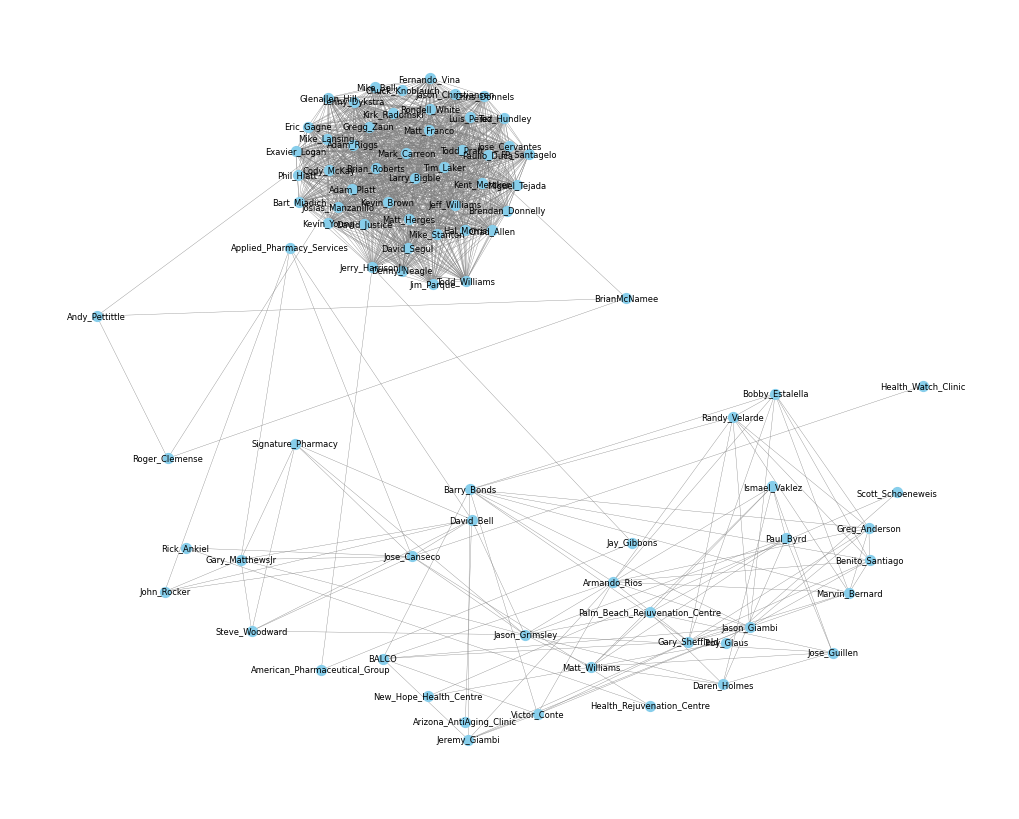

In [104]:
#After messing with different display algorithms, the spring_layout gave me the best results, so I chose that to use.
#The k parameter in the spring_layout algorithm represents the optimal distance between nodes. 
#Increasing k will make the nodes spread out more.
#The scale parameter can be used to scale the entire layout. A smaller value will spread out the nodes more.

#Setting how the graph will display the network
pos = nx.spring_layout(G, k=1, scale=2)

#determining the size of the graph
plt.figure(figsize=(10, 8))

#adjusting specifics of the graph to make it visually appealing
nx.draw(G, pos=pos, with_labels=True, font_size=6, node_size=50, node_color='skyblue', font_color='black', edge_color='gray', width=0.25)

#removes axes and grid
plt.axis('off')

#displays the network graph
plt.show()

No matter which display I chose, it was a bit messy. But this was as close as I could get it the network displayed on the steriod site. Although it is different from it, it has a similar appearance. I am not exactly sure if it is displaying similar patterns however. 

Now is when I can start trying to find an influential node to cut off from the rest of the group. 

There are some key suspects that seem to provide pipelines, like American_Pharmaceutical_Group and Andy_Pettittle. It seems like cutting one of them off from the cluster that is all feeding each other could have potential. 

I have made enough assumptions though with the lack of context, so instead of trying to best guess, I can employ built in functions to determine influence among a social network. 

In [111]:
#Degree centrality measures how well-connected a node is. Nodes with higher degree centrality have more connections. 
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))
print(sorted_degree_centrality)

{'Jerry_HarrisonJr': 0.5542168674698795, 'Brian_Roberts': 0.5301204819277109, 'Todd_Pratt': 0.5301204819277109, 'Tod_Hundley': 0.5301204819277109, 'Kent_Mercker': 0.5301204819277109, 'Jason_Christiansen': 0.5301204819277109, 'Matt_Herges': 0.5301204819277109, 'David_Segul': 0.5301204819277109, 'Matt_Franco': 0.5301204819277109, 'Adam_Riggs': 0.5301204819277109, 'Exavier_Logan': 0.5301204819277109, 'Fernando_Vina': 0.5301204819277109, 'Chad_Allen': 0.5301204819277109, 'Larry_Bigble': 0.5301204819277109, 'Eric_Gagne': 0.5301204819277109, 'Paulio_Duca': 0.5301204819277109, 'Brendan_Donnelly': 0.5301204819277109, 'Chris_Donnels': 0.5301204819277109, 'Cody_McKay': 0.5301204819277109, 'Mark_Carreon': 0.5301204819277109, 'Lenny_Dykstra': 0.5301204819277109, 'Rondell_White': 0.5301204819277109, 'FP_Santagelo': 0.5301204819277109, 'Mike_Stanton': 0.5301204819277109, 'Todd_Williams': 0.5301204819277109, 'Josias_Manzanillo': 0.5301204819277109, 'Jose_Cervantes': 0.5301204819277109, 'David_Justice

In [112]:
#Betweenness centrality identifies nodes that act as bridges between different parts of the network. 
#Nodes with higher betweenness centrality are influential in controlling information flow between other nodes. 
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True))
print(sorted_betweenness_centrality)

{'Jerry_HarrisonJr': 0.025859535703790775, 'Jason_Grimsley': 0.01939465177784308, 'Jose_Canseco': 0.014692918013517485, 'David_Bell': 0.006464883925947694, 'Gary_MatthewsJr': 0.0017631501616220983, 'Jason_Giambi': 0.0011019688510138115, 'Gary_Sheffield': 0.0011019688510138115, 'Barry_Bonds': 0.0011019688510138115, 'Armando_Rios': 0.0011019688510138115, 'Victor_Conte': 0.0, 'Jeremy_Giambi': 0.0, 'BALCO': 0.0, 'Bobby_Estalella': 0.0, 'Benito_Santiago': 0.0, 'Marvin_Bernard': 0.0, 'Randy_Velarde': 0.0, 'Greg_Anderson': 0.0, 'Matt_Williams': 0.0, 'Daren_Holmes': 0.0, 'Paul_Byrd': 0.0, 'Jose_Guillen': 0.0, 'Ismael_Vaklez': 0.0, 'Palm_Beach_Rejuvenation_Centre': 0.0, 'Steve_Woodward': 0.0, 'Signature_Pharmacy': 0.0, 'Troy_Glaus': 0.0, 'Scott_Schoeneweis': 0.0, 'New_Hope_Health_Centre': 0.0, 'John_Rocker': 0.0, 'Applied_Pharmacy_Services': 0.0, 'Arizona_AntiAging_Clinic': 0.0, 'Rick_Ankiel': 0.0, 'Health_Rejuvenation_Centre': 0.0, 'Health_Watch_Clinic': 0.0, 'Jay_Gibbons': 0.0, 'American_Phar

----------------------

The degree and betweenness centralities show that Jerry Harrison Jr is the most well-connected and the most influential bridge. My initial observation was wrong, but now I have concrete proof of someone I can remove to see how the network changes and hopefully collapses. 

To do so, I am going to remove any instance of Jerry from my original filtered list and display a new network without him to see what happens. I can do this with a similar method of list compression that I used earlier to remove instances where there were pairs of the same person/group

------------------------

In [115]:
byebye_jerry = [(name1, name2) for name1, name2 in filtered_edge_list if 'Jerry_HarrisonJr' not in (name1, name2)]
print(byebye_jerry)

[('Victor_Conte', 'Jeremy_Giambi'), ('Victor_Conte', 'Jason_Giambi'), ('Victor_Conte', 'Gary_Sheffield'), ('Victor_Conte', 'Barry_Bonds'), ('Victor_Conte', 'Armando_Rios'), ('Victor_Conte', 'BALCO'), ('Jeremy_Giambi', 'Victor_Conte'), ('Jeremy_Giambi', 'Jason_Giambi'), ('Jeremy_Giambi', 'Gary_Sheffield'), ('Jeremy_Giambi', 'Barry_Bonds'), ('Jeremy_Giambi', 'Armando_Rios'), ('Jeremy_Giambi', 'BALCO'), ('Jason_Giambi', 'Victor_Conte'), ('Jason_Giambi', 'Jeremy_Giambi'), ('Jason_Giambi', 'Gary_Sheffield'), ('Jason_Giambi', 'Bobby_Estalella'), ('Jason_Giambi', 'Benito_Santiago'), ('Jason_Giambi', 'Marvin_Bernard'), ('Jason_Giambi', 'Barry_Bonds'), ('Jason_Giambi', 'Armando_Rios'), ('Jason_Giambi', 'Randy_Velarde'), ('Jason_Giambi', 'BALCO'), ('Jason_Giambi', 'Greg_Anderson'), ('Gary_Sheffield', 'Victor_Conte'), ('Gary_Sheffield', 'Jeremy_Giambi'), ('Gary_Sheffield', 'Jason_Giambi'), ('Gary_Sheffield', 'Bobby_Estalella'), ('Gary_Sheffield', 'Benito_Santiago'), ('Gary_Sheffield', 'Marvin_Ber

-------------------

With the new list, I can now remake the network graph using the same metrics as I used above for the sake of consistency

-------------------

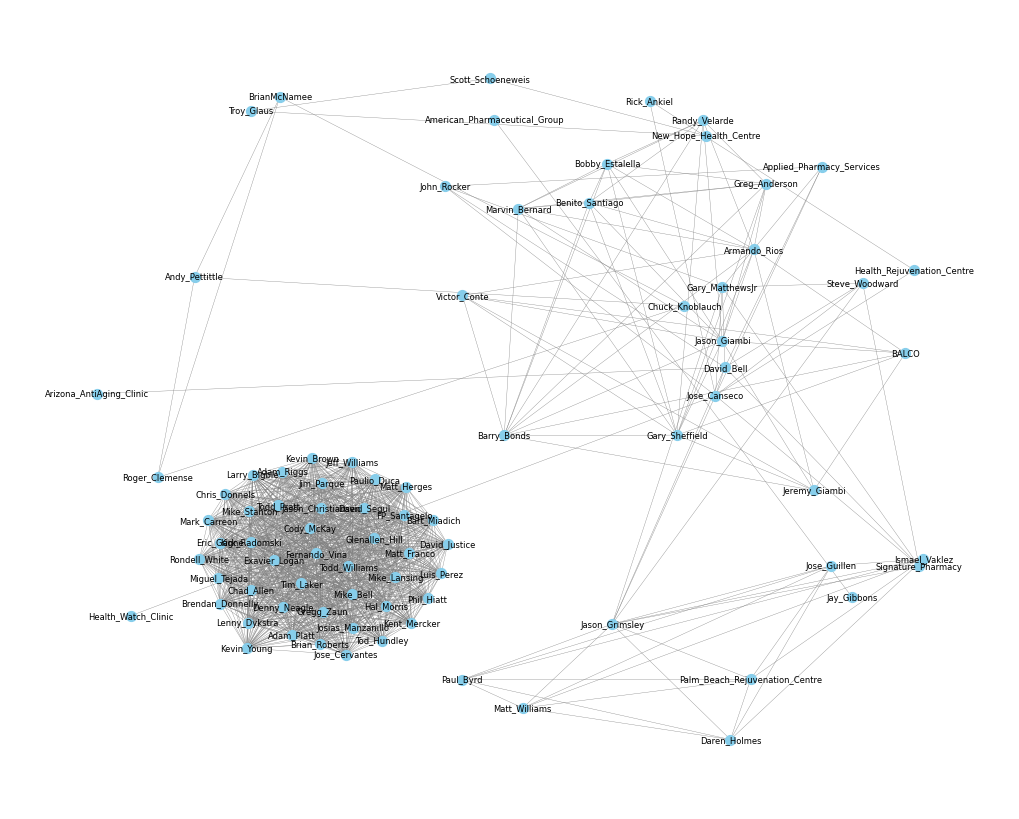

In [116]:
#Initiates an empty network graph
G2 = nx.Graph()
#Addes the filtered egde list to the graph
G2.add_edges_from(byebye_jerry)
#Setting how the graph will display the network
pos = nx.spring_layout(G2, k=1, scale=2)
#determining the size of the graph
plt.figure(figsize=(10, 8))
#adjusting specifics of the graph to make it visually appealing
nx.draw(G2, pos=pos, with_labels=True, font_size=6, node_size=50, node_color='skyblue', font_color='black', edge_color='gray', width=0.25)
#removes axes and grid
plt.axis('off')
#displays the network graph
plt.show()

Well that seemed to do very little. The mega cluster is still intact and hardly anything changed. I know theoretically, the most influential person was removed, but the steriod problem is ongoing. So when I earlier said that I wanted to cut the head off of the snake, it seemed like it didn't matter for this issue. This tells me that Jerry was not the only influential figure in the network and that steriod usage was most likely a systemic issue in the mlb where one specific person did not make much of a difference in it. Even with the American_Pharmaceutical_Group not supplying the major cluster anymore, there are still ways for the cluster to survive and thrive. For example, when Pablo Escobar was caught and killed, the cocaine trade was still able to function becuase it was a systemic issue. All in all, this was cool to see and visualize, but I am dissapointed the visualized results were not more impressive. 